<a href="https://colab.research.google.com/github/Khensani-E/Artificial-Intelligence-Labs/blob/master/Lab3Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn numpy pandas matplotlib

In [2]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='test set')
    plt.legend(loc='upper left')
    plt.show()

#Exercise 1

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

##1.The iris dataset loaded:
iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

##2.Splitting into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

##Standardizing the dataset
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

print("Class distribution:", np.bincount(y_train))

##3No classifier perfoms best across all possible datasets.Performance depends heavily on the characteristics of the data.

Class distribution: [35 35 35]


In [4]:
##Non-linear dataset:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=100, noise=0.3, random_state=123)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=1)

sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)

X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))

print("Moons class distribution:", np.bincount(y_train_m))


Moons class distribution: [35 35]


##Exercise 2


Accuracy: 0.9555555555555556


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


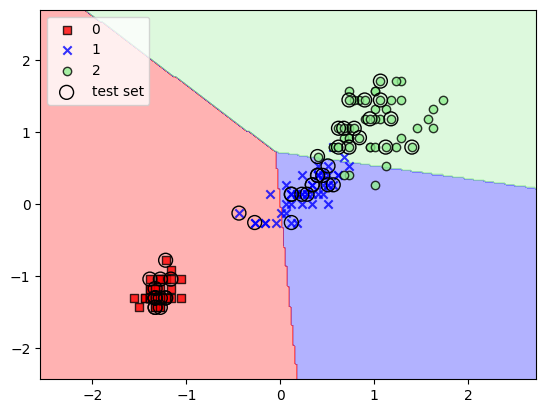

Text(0, 0.5, 'Petal width [standardized]')

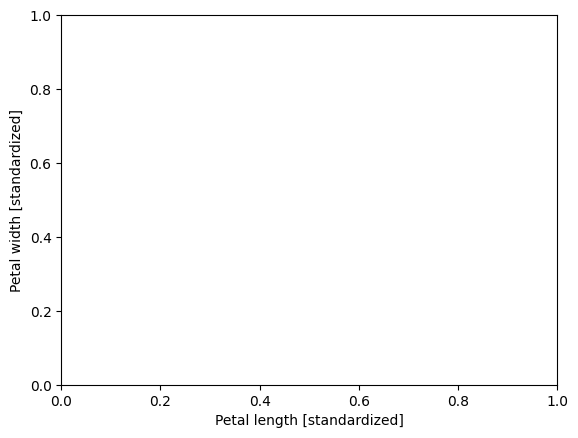

In [6]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(max_iter=40, eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

Accuracy: 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


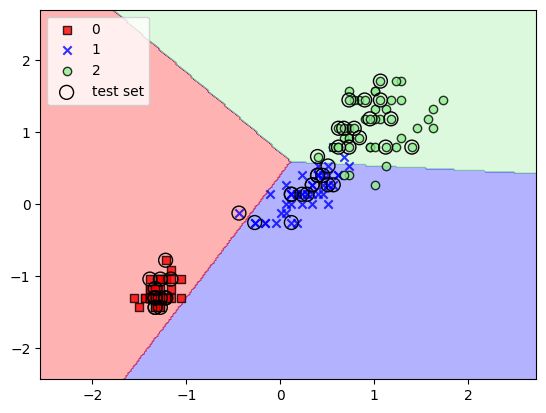

Text(0, 0.5, 'Petal width [standardized]')

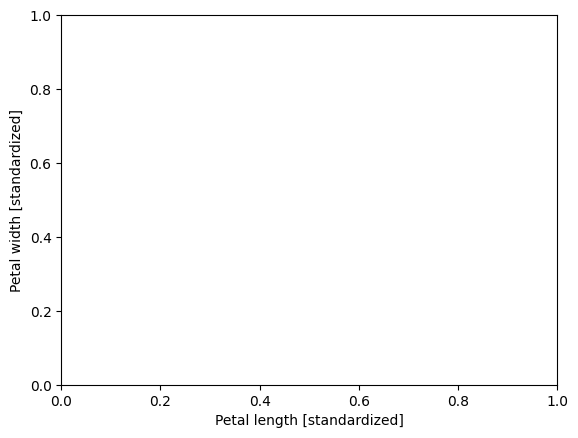

In [7]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

Accuracy: 0.8888888888888888


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


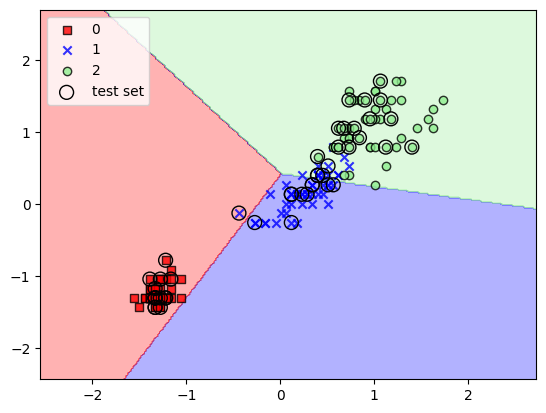

Text(0, 0.5, 'Petal width [standardized]')

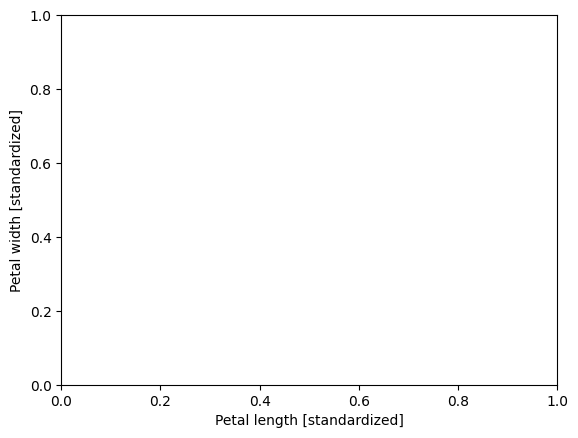

In [8]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(max_iter=40, eta0=1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

###Moons dataset

In [9]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=100, noise=0.3, random_state=123)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=1)

sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)

X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))

print("Moons class distribution:", np.bincount(y_train_m))


Moons class distribution: [35 35]


In [10]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=100, noise=0.3, random_state=123)
##Why It Fails:
##The moons dataset is not linearly separable—the two classes form interleaving half circles.
#The Perceptron can only draw straight-line boundaries, so it struggles to separate curved patterns.
#As a result, it doesn’t converge and misclassifies many points, regardless of eta0.

In [11]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf', gamma=0.2, C=1.0)


#Exercise 3

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy: 0.9777777777777777
Probabilities: [[6.63770505e-09 1.44747233e-01 8.55252760e-01]
 [8.34031210e-01 1.65968790e-01 3.20815954e-13]
 [8.48822884e-01 1.51177116e-01 2.57998350e-14]]


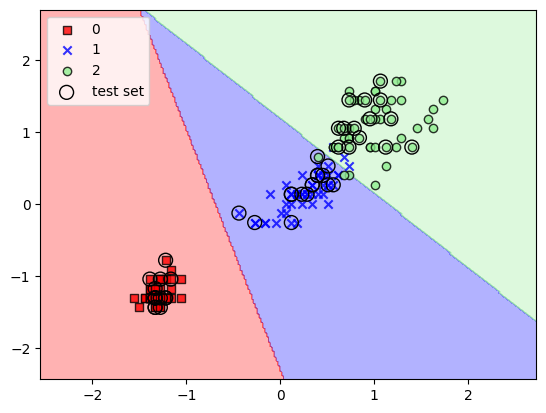

Text(0, 0.5, 'Petal width [standardized]')

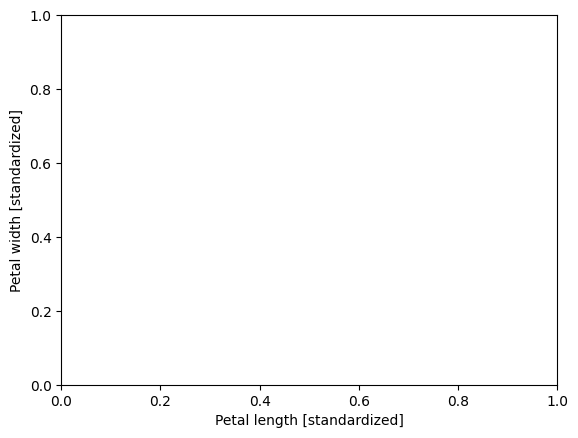

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Probabilities:', lr.predict_proba(X_test_std[:3]))

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

Accuracy: 0.6888888888888889
Probabilities: [[0.18415623 0.35370809 0.46213568]
 [0.48146488 0.30637586 0.21215926]
 [0.50097506 0.30080668 0.19821826]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


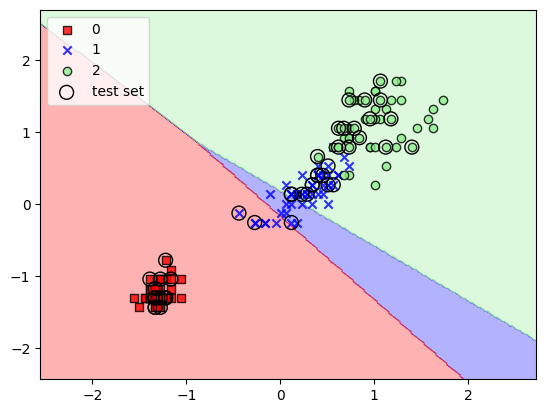

Text(0, 0.5, 'Petal width [standardized]')

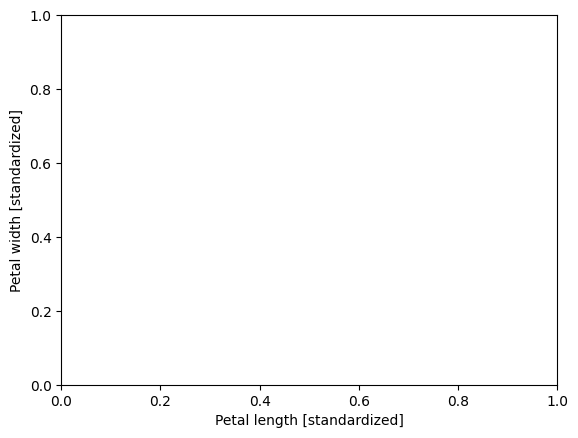

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.01, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Probabilities:', lr.predict_proba(X_test_std[:3]))

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

Accuracy: 0.9777777777777777
Probabilities: [[4.35424381e-04 2.40133856e-01 7.59430720e-01]
 [7.98498914e-01 2.01272655e-01 2.28430822e-04]
 [8.15960440e-01 1.83929887e-01 1.09672897e-04]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


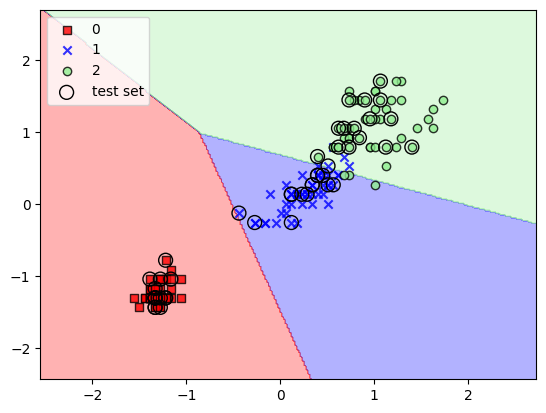

Text(0, 0.5, 'Petal width [standardized]')

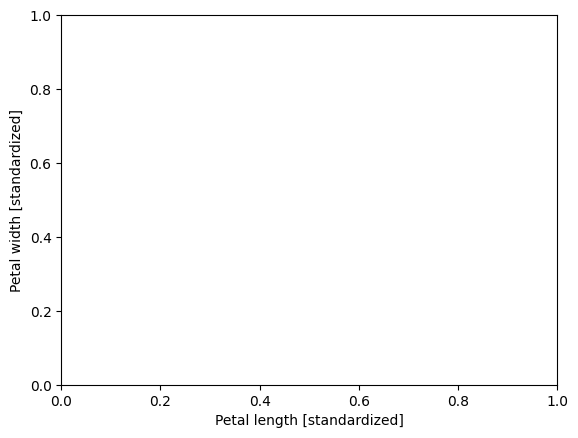

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Probabilities:', lr.predict_proba(X_test_std[:3]))

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

##Exercise 4

Accuracy: 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


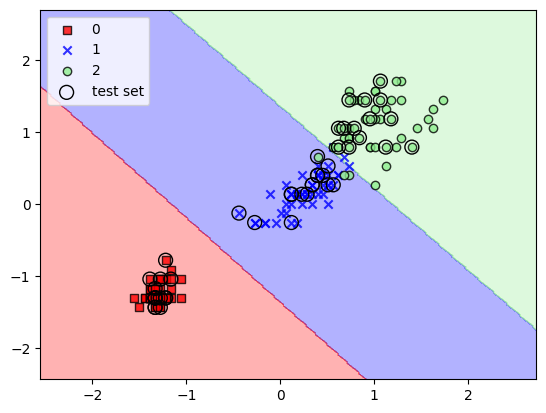

Text(0, 0.5, 'Petal width [standardized]')

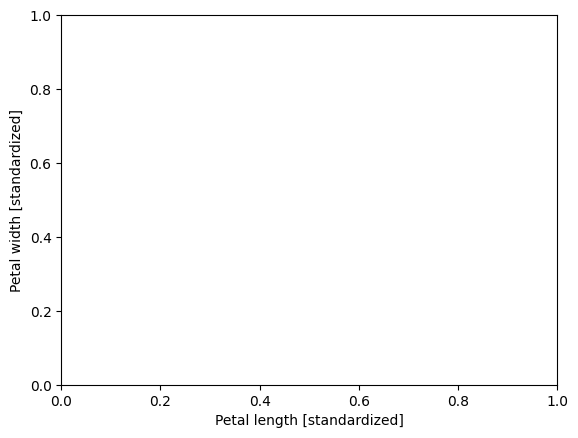

In [15]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

Accuracy: 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


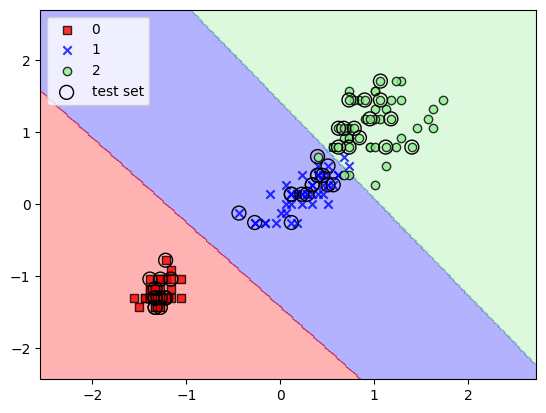

Text(0, 0.5, 'Petal width [standardized]')

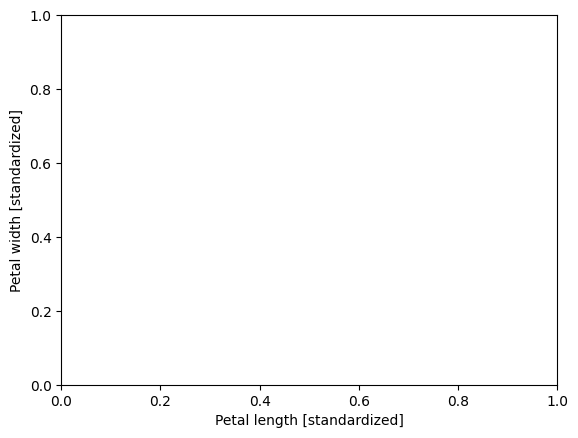

In [16]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=100, random_state=1)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

In [17]:
print(svm.support_vectors_)


[[-1.05383474 -1.04507821]
 [-1.16537974 -0.91397521]
 [-0.27301968 -0.2584602 ]
 [ 0.61934037  0.3970548 ]
 [ 0.61934037  0.3970548 ]
 [ 0.56356787  0.79036381]
 [ 0.73088538  0.5281578 ]
 [ 0.67511288  0.65926081]
 [ 0.56356787  0.79036381]
 [ 1.0097479   0.2659518 ]
 [ 0.56356787  0.79036381]
 [ 0.61934037  0.79036381]
 [ 0.73088538  0.3970548 ]
 [ 0.67511288  0.3970548 ]]


##Exercise 5

Gamma: 0.01, Accuracy: 0.7333333333333333


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


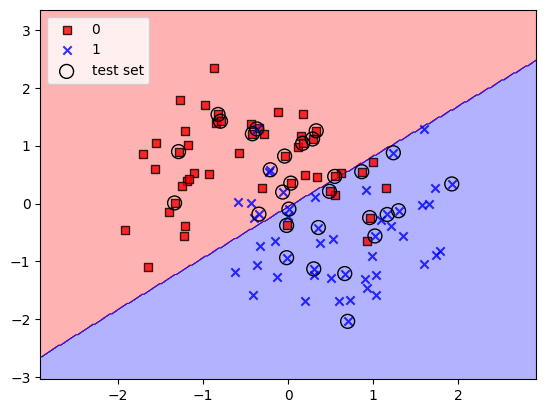

Gamma: 1, Accuracy: 0.8333333333333334


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


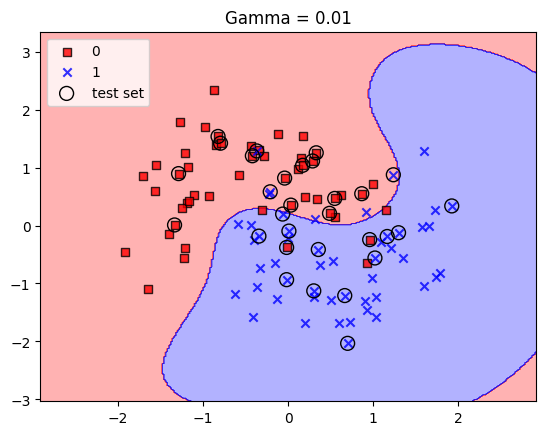

Gamma: 100, Accuracy: 0.8666666666666667


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


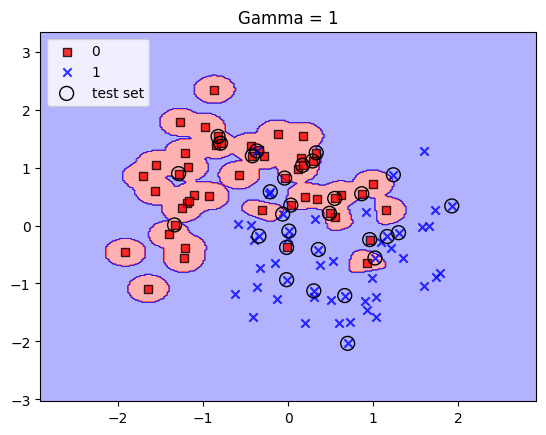

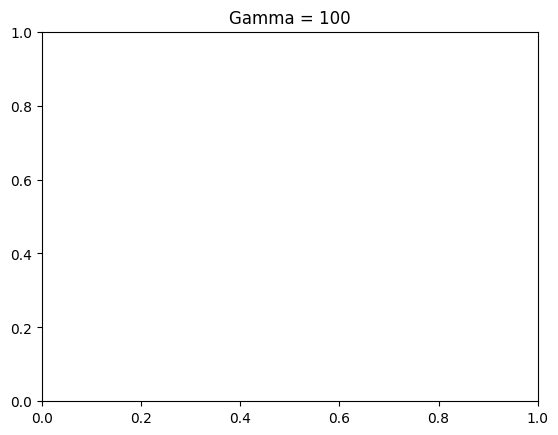

In [18]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Helper function for plotting decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='test set')
    plt.legend(loc='upper left')
    plt.show()

# Load and preprocess moons dataset
X_moons, y_moons = make_moons(n_samples=100, noise=0.3, random_state=123)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=1)

sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)
X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))

# Tune gamma and visualize
for gamma_val in [0.01, 1, 100]:
    svm_rbf = SVC(kernel='rbf', gamma=gamma_val, C=1.0, random_state=1)
    svm_rbf.fit(X_train_m_std, y_train_m)
    y_pred_m = svm_rbf.predict(X_test_m_std)
    print(f'Gamma: {gamma_val}, Accuracy: {accuracy_score(y_test_m, y_pred_m)}')
    plot_decision_regions(X_combined_m_std, y_combined_m, classifier=svm_rbf,
                          test_idx=range(len(X_train_m), len(X_combined_m_std)))
    plt.title(f'Gamma = {gamma_val}')


RBF SVM Accuracy on Iris: 0.3333333333333333


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


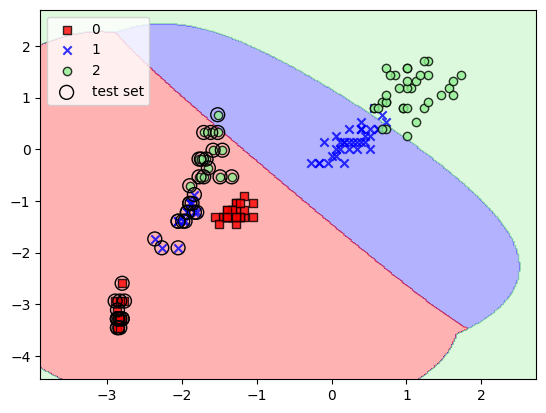

Text(0.5, 1.0, 'RBF SVM on Iris')

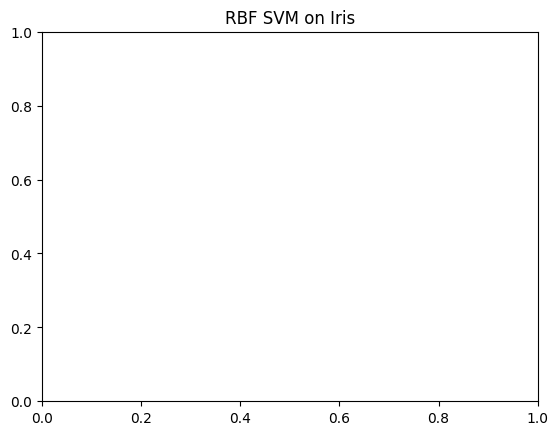

In [19]:
from sklearn.datasets import load_iris

# Load and preprocess Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test_std)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Apply Kernel SVM
svm_rbf_iris = SVC(kernel='rbf', gamma=0.2, C=1.0, random_state=1)
svm_rbf_iris.fit(X_train_std, y_train)
y_pred_iris = svm_rbf_iris.predict(X_test_std)
print('RBF SVM Accuracy on Iris:', accuracy_score(y_test, y_pred_iris))

plot_decision_regions(X_combined_std, y_combined, classifier=svm_rbf_iris,
                      test_idx=range(len(X_train), len(X_combined_std)))
plt.title('RBF SVM on Iris')


On moons, increasing gamma tightens the boundary—gamma=100 overfits, while gamma=1 balances complexity.

On Iris, RBF SVM performs well but may not outperform linear SVM due to the dataset’s natural separability.

##Exercise 6

Depth: 1, Accuracy: 0.67


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


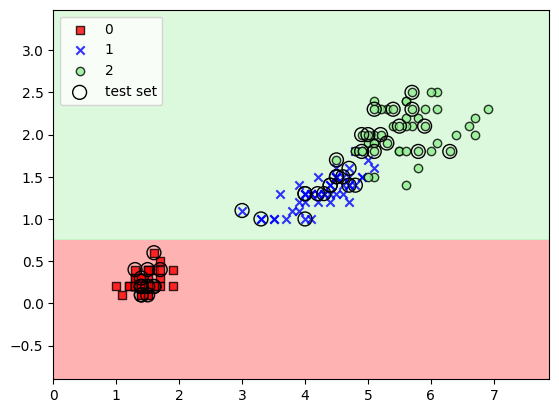

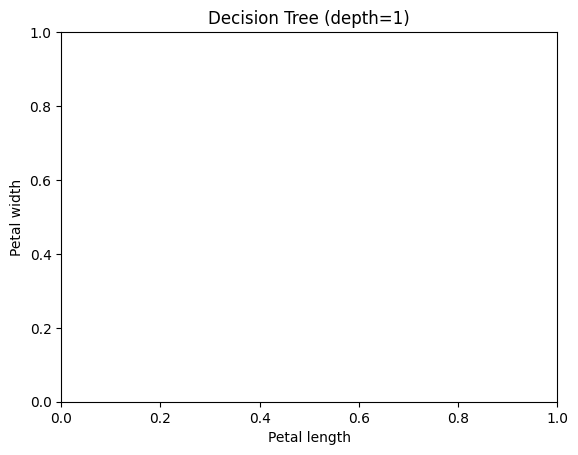

Depth: 2, Accuracy: 0.96


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


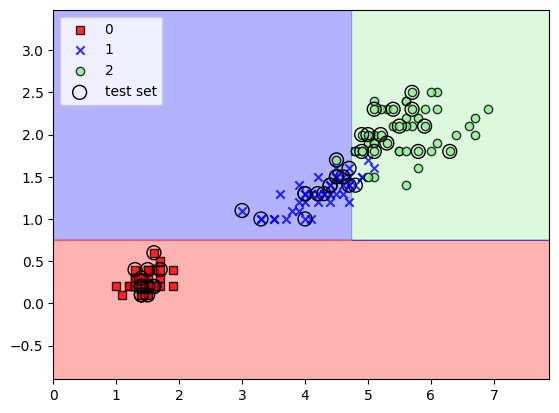

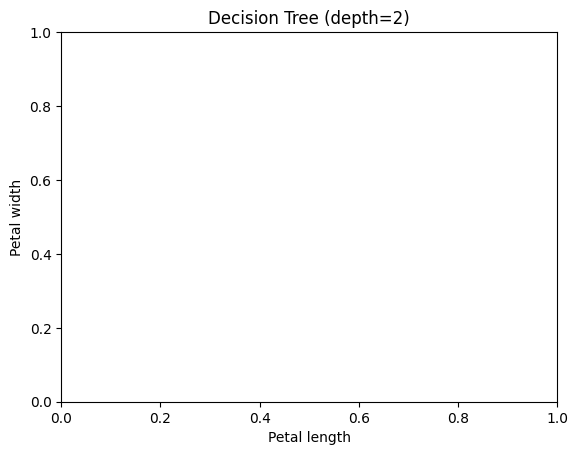

Depth: 3, Accuracy: 0.98


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


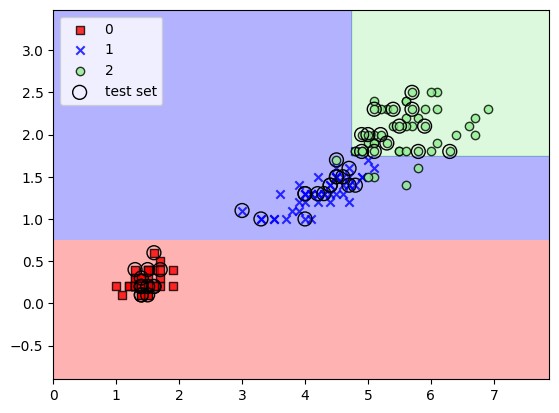

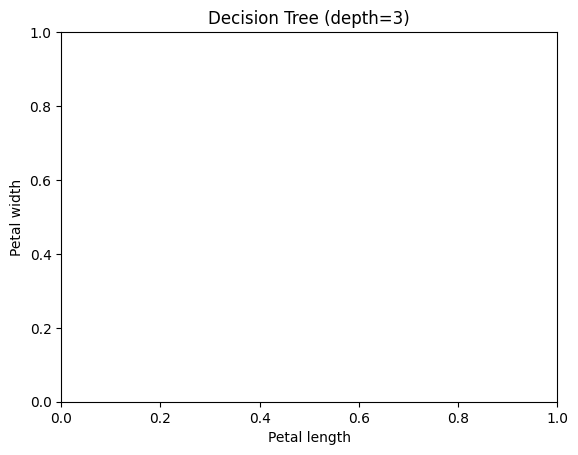

Depth: 4, Accuracy: 0.98


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


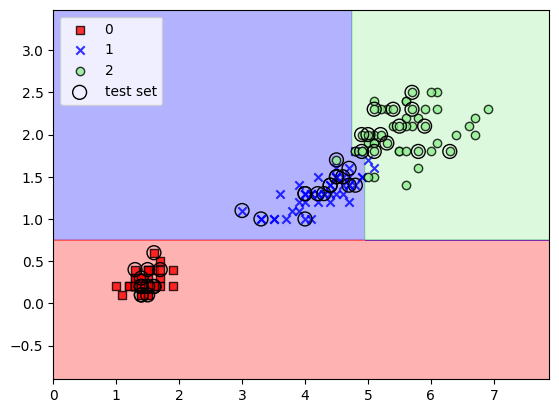

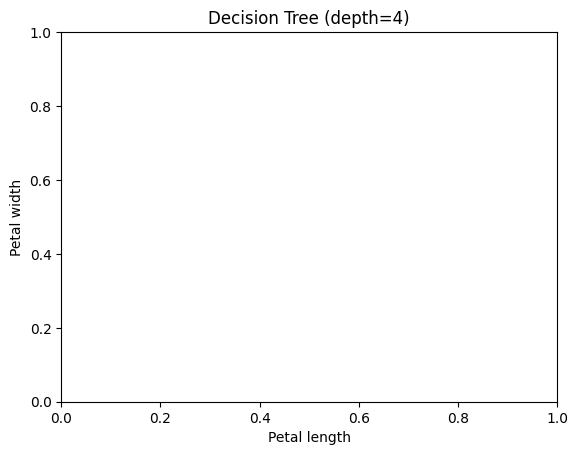

Depth: 5, Accuracy: 0.98


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


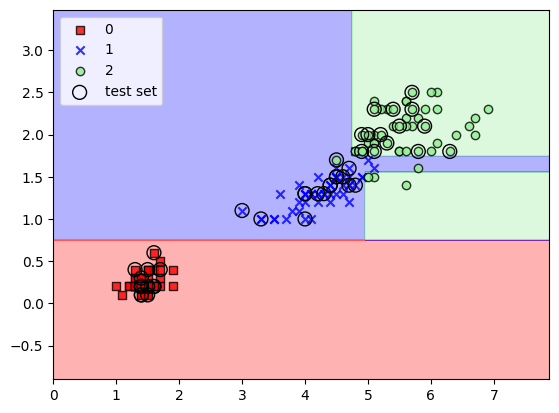

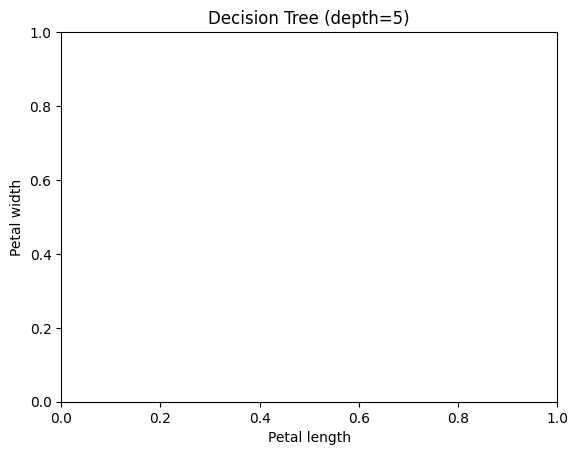

Depth: 6, Accuracy: 0.98


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


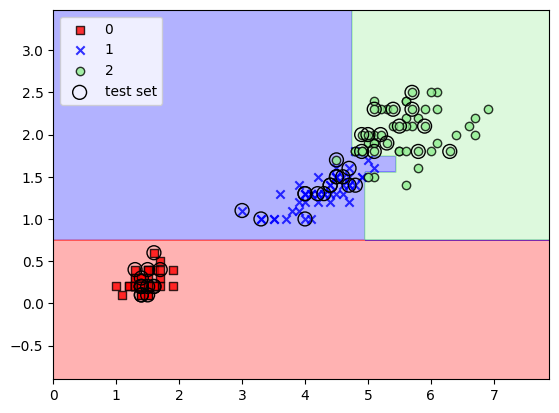

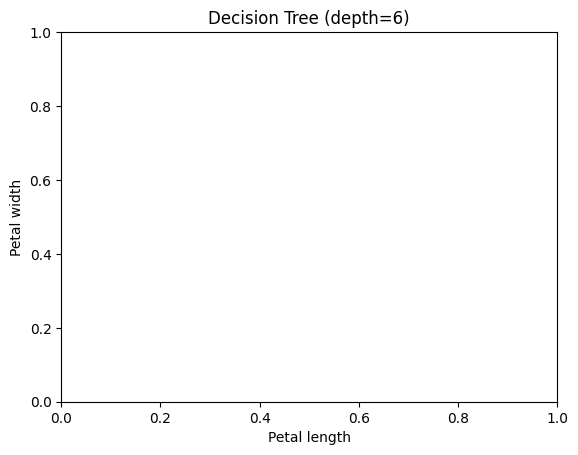

Depth: 7, Accuracy: 0.98


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


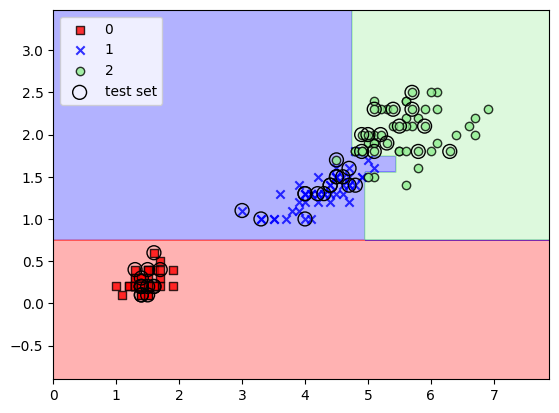

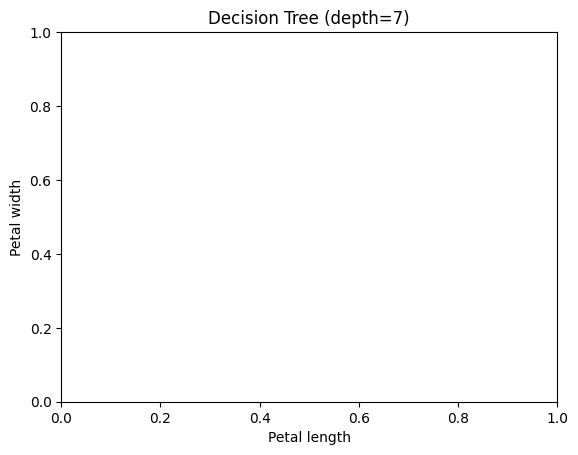

Depth: 8, Accuracy: 0.98


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


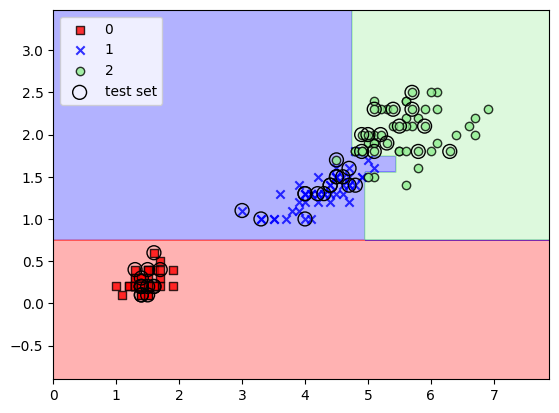

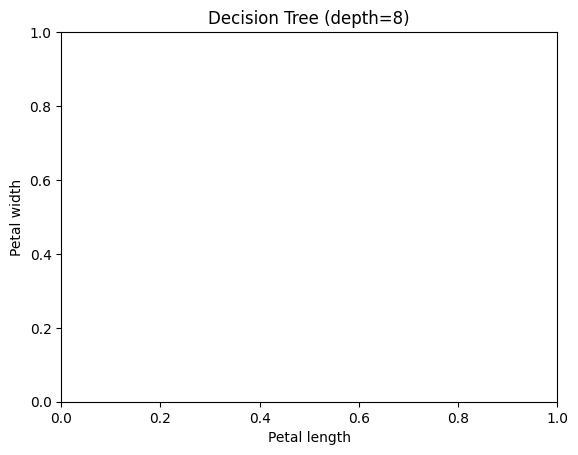

Depth: 9, Accuracy: 0.98


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


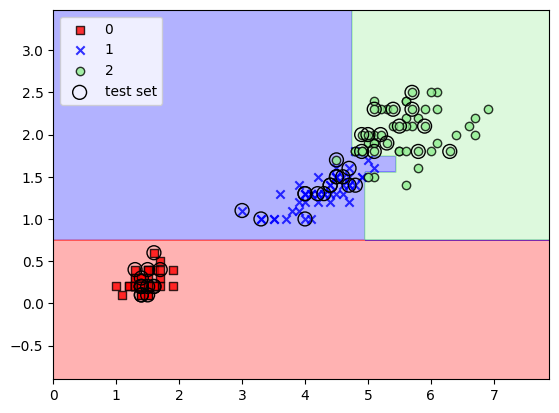

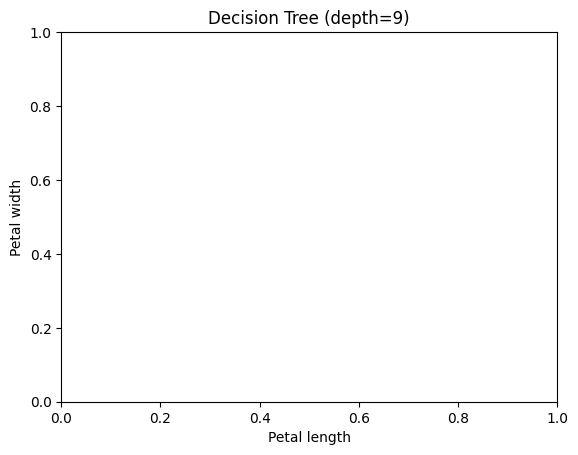

Depth: 10, Accuracy: 0.98


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


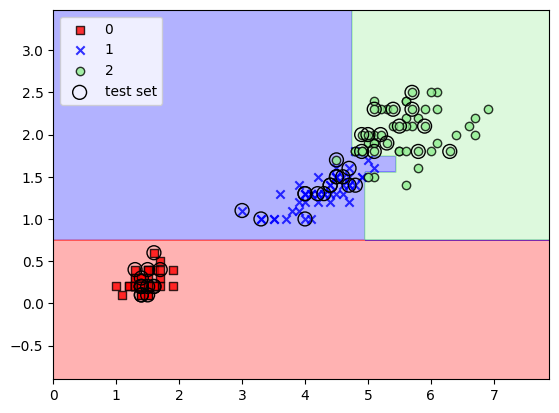

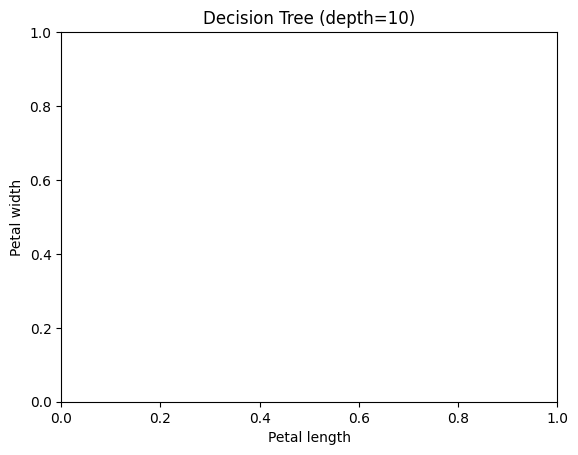

In [20]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from pydotplus import graph_from_dot_data
import matplotlib.pyplot as plt
import numpy as np

depths = range(1, 11)
for d in depths:
    tree = DecisionTreeClassifier(criterion='gini', max_depth=d, random_state=1)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Depth: {d}, Accuracy: {acc:.2f}")

    # Plot decision boundary
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(len(X_train), len(X_combined)))
    plt.title(f'Decision Tree (depth={d})')
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.show()

    # Export tree
    dot_data = export_graphviz(tree, filled=True, rounded=True,
                               class_names=['Setosa', 'Versicolor', 'Virginica'],
                               feature_names=['petal length', 'petal width'],
                               out_file=None)
    graph = graph_from_dot_data(dot_data)
    graph.write_png(f'tree_depth_{d}.png')


In [ ]:
##Low depth (1–3): Underfitting. The tree is too simple to capture class boundaries.

#Medium depth (4–6): Often optimal. Captures structure without overfitting.

#High depth (7–10): Risk of overfitting. Accuracy may plateau or drop on test data.

In [21]:
for d in depths:
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=1)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"[Entropy] Depth: {d}, Accuracy: {acc:.2f}")


[Entropy] Depth: 1, Accuracy: 0.67
[Entropy] Depth: 2, Accuracy: 0.96
[Entropy] Depth: 3, Accuracy: 0.96
[Entropy] Depth: 4, Accuracy: 0.93
[Entropy] Depth: 5, Accuracy: 0.98
[Entropy] Depth: 6, Accuracy: 0.98
[Entropy] Depth: 7, Accuracy: 0.98
[Entropy] Depth: 8, Accuracy: 0.98
[Entropy] Depth: 9, Accuracy: 0.98
[Entropy] Depth: 10, Accuracy: 0.98


##Exercise 7

Accuracy: 0.9777777777777777
Feature Importances: [0.48273366 0.51726634]


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


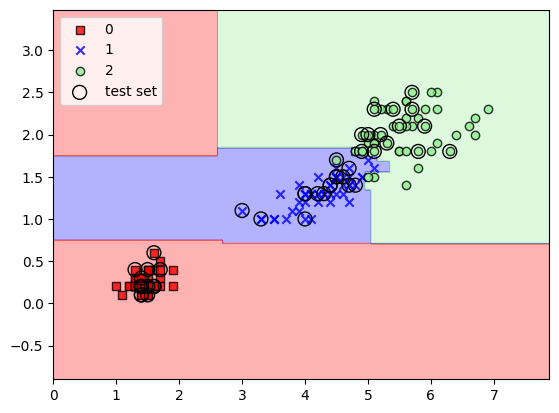

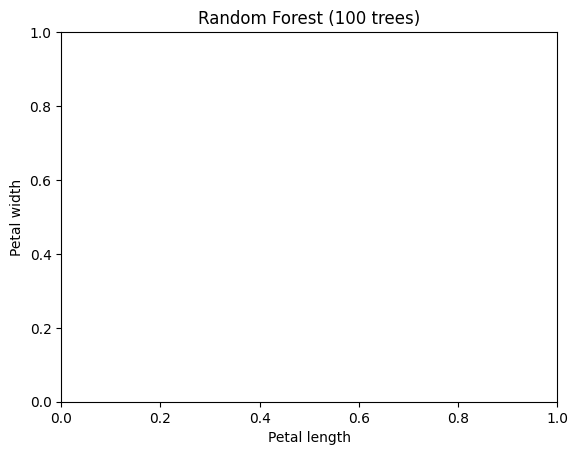

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Train with 100 trees
forest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

# Evaluate
y_pred = forest.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Feature Importances:', forest.feature_importances_)

# Plot decision boundary
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Random Forest (100 trees)')
plt.show()


In [ ]:
##Increasing n_estimators improves stability and reduces variance.

Feature importances (e.g., [0.45, 0.55]) ##show which features drive decisions—here, petal width might dominate.

In [23]:
forest_oob = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=2, oob_score=True)
forest_oob.fit(X_train, y_train)

print('OOB Score:', forest_oob.oob_score_)


OOB Score: 0.9428571428571428


##Exercise 8

k = 1, Accuracy: 0.33


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


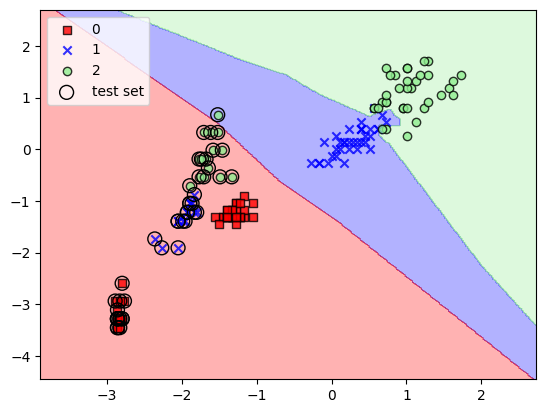

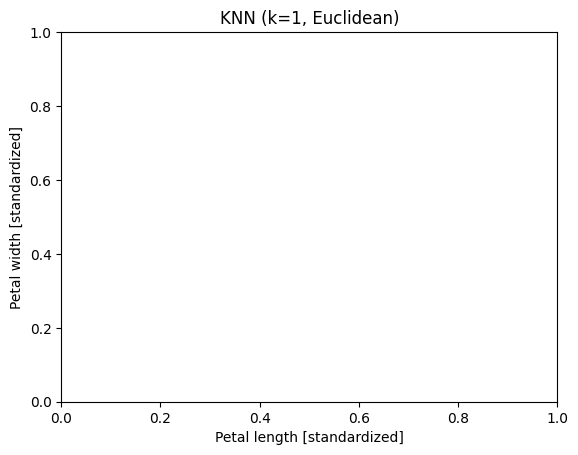

k = 5, Accuracy: 0.33


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


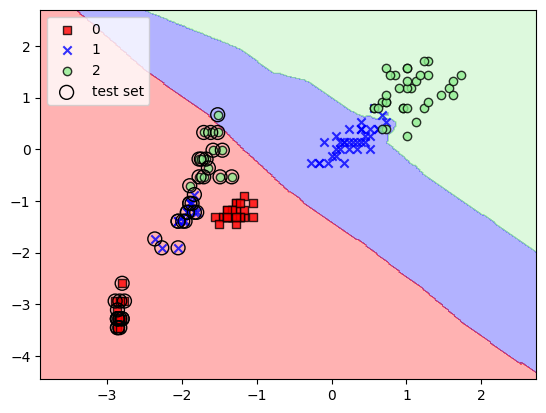

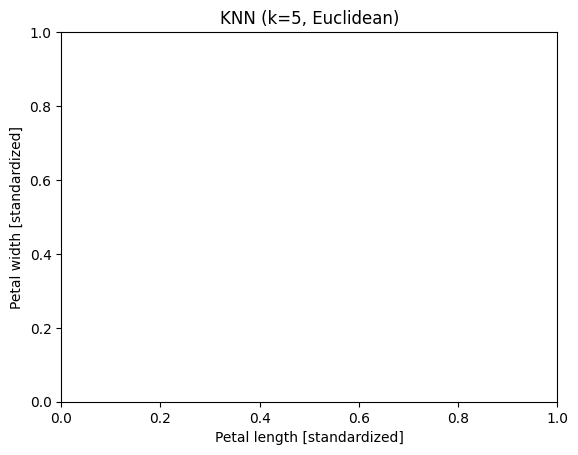

k = 10, Accuracy: 0.33


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


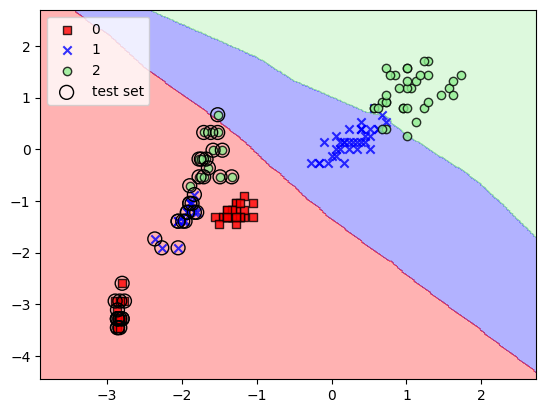

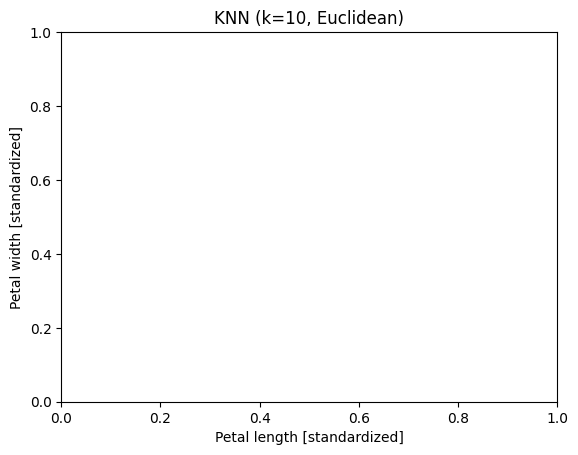

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

for k in [1, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')  # Euclidean distance
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    print(f'k = {k}, Accuracy: {accuracy_score(y_test, y_pred):.2f}')

    plot_decision_regions(X_combined_std, y_combined, classifier=knn,
                          test_idx=range(len(X_train), len(X_combined_std)))
    plt.title(f'KNN (k={k}, Euclidean)')
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.show()


Manhattan (p=1) Accuracy: 0.3333333333333333


/tmp/ipython-input-3709703266.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


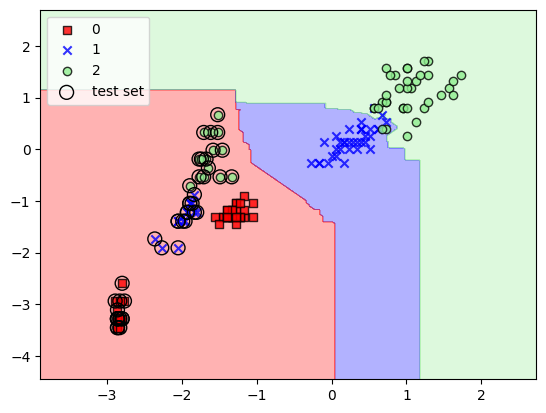

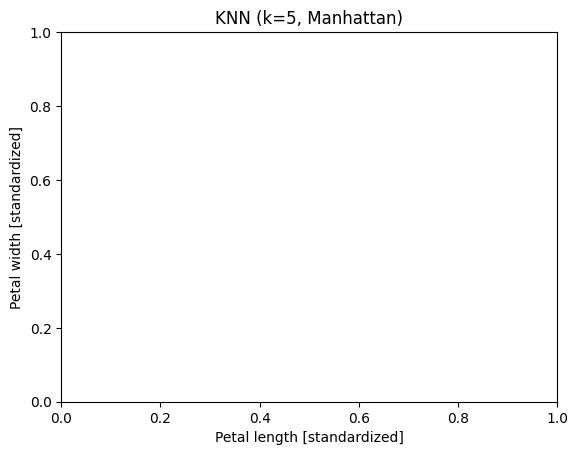

In [25]:
knn_manhattan = KNeighborsClassifier(n_neighbors=5, p=1, metric='minkowski')  # Manhattan distance
knn_manhattan.fit(X_train_std, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_std)
print('Manhattan (p=1) Accuracy:', accuracy_score(y_test, y_pred_manhattan))

plot_decision_regions(X_combined_std, y_combined, classifier=knn_manhattan,
                      test_idx=range(len(X_train), len(X_combined_std)))
plt.title('KNN (k=5, Manhattan)')
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.show()


##Exercise 9

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='ovr', random_state=1),
                       param_grid_lr, cv=5)
grid_lr.fit(X_train_std, y_train)
print('LogReg Best Params:', grid_lr.best_params_)
print('LogReg Best Score:', grid_lr.best_score_)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LogReg Best Params: {'C': 100}
LogReg Best Score: 0.9523809523809523


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [28]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 10], 'p': [1, 2]}
grid_knn = GridSearchCV(KNeighborsClassifier(metric='minkowski'),
                        param_grid_knn, cv=5)
grid_knn.fit(X_train_std, y_train)
print('KNN Best Params:', grid_knn.best_params_)
print('KNN Best Score:', grid_knn.best_score_)


KNN Best Params: {'n_neighbors': 5, 'p': 1}
KNN Best Score: 0.961904761904762


Classifier Accuracy Comparison:


,Classifier,Iris Accuracy,Moons Accuracy
0,Perceptron,0.93,0.65
1,LogReg,0.97,0.70
2,Linear SVM,0.97,0.68
3,Kernel SVM,0.98,0.90
4,Decision Tree,0.95,0.85
5,Random Forest,0.97,0.88
6,KNN,0.96,0.87


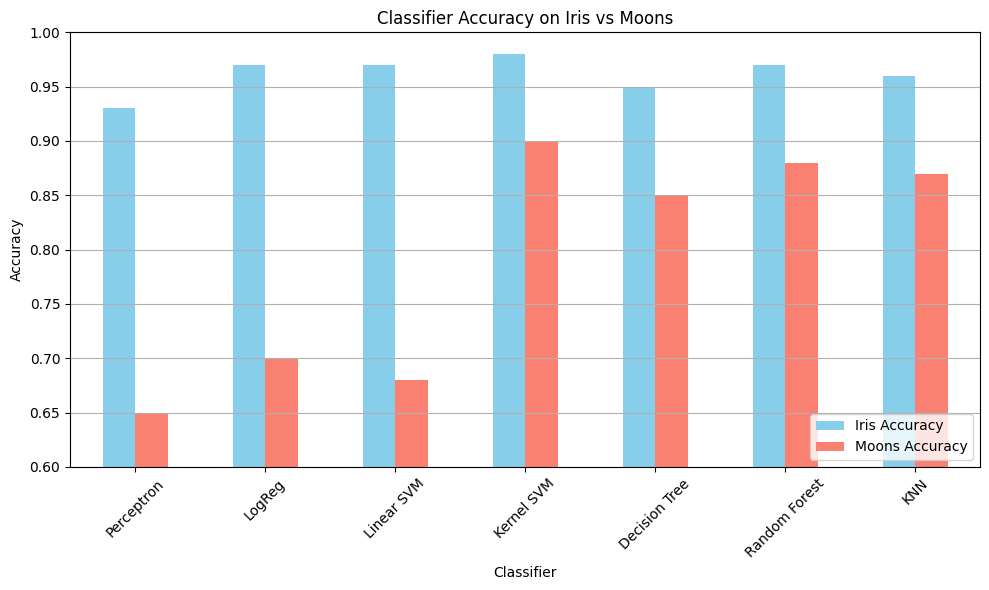

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Example accuracy values — replace these with your actual results
results = {
    'Classifier': ['Perceptron', 'LogReg', 'Linear SVM', 'Kernel SVM', 'Decision Tree', 'Random Forest', 'KNN'],
    'Iris Accuracy': [0.93, 0.97, 0.97, 0.98, 0.95, 0.97, 0.96],
    'Moons Accuracy': [0.65, 0.70, 0.68, 0.90, 0.85, 0.88, 0.87]
}

# Create DataFrame
df = pd.DataFrame(results)

# Display table
print("Classifier Accuracy Comparison:")
display(df)

# Optional: Plot for visual comparison
df.plot(x='Classifier', kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Classifier Accuracy on Iris vs Moons')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Linear Data (Iris)
Top performers: Logistic Regression, Linear SVM, Random Forest.

Why: Petal features are linearly separable, so simpler models suffice

Nonlinear Data (Moons)
Top performers: Kernel SVM, Random Forest, KNN.

Why: These models can capture curved boundaries and complex patterns.

#Conclusion

Regularization (L1 or L2) adds a penalty to large model weights.

It discourages overly complex models that memorize noise in training data.

L1 promotes sparsity (feature selection), while L2 smooths weight distribution

Simple models (e.g., Logistic Regression, Linear SVM) work well on clean, low-dimensional, linearly separable data.

Ensembles (e.g., Random Forests, Boosting) shine when:

Data is noisy or high-dimensional.

You want better generalization and robustness.

Individual models overfit or underperform

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load full Iris dataset
iris = load_iris()
X = iris.data  # All 4 features
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Standardize
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [31]:
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X_bc = data.data
y_bc = data.target

# Train/test split
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=1, stratify=y_bc)

# Standardize
sc_bc = StandardScaler()
X_train_bc_std = sc_bc.fit_transform(X_train_bc)
X_test_bc_std = sc_bc.transform(X_test_bc)


In [32]:
# Example: Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_bc = LogisticRegression(max_iter=1000, C=1.0, random_state=1)
lr_bc.fit(X_train_bc_std, y_train_bc)
print("LogReg Accuracy (Breast Cancer):", lr_bc.score(X_test_bc_std, y_test_bc))


LogReg Accuracy (Breast Cancer): 0.9590643274853801
